# Exploratory Data Analysis of Loan Prediction Data

#### Business Goal: To automate the loan eligibility process based on customer detail using previous data.
Dataset can be downloaded from my GitHub repository: [mygitrepo](https://github.com/crosstrack10/data-science-projects/blob/main/datasets/loan_prediction_train.csv)

## Exploratory Analysis
The first that needs to be done before exploring the data is to import necessary packages and read in the dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# reading in dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/loan_prediction_train.csv"
loan_data = pd.read_csv(url)

Now, let's take a look at the structure of the data.

In [3]:
# first five rows
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# general variable info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# counting number of nulls
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Quite a few nulls present for certain variables. 
We will need to impute them or drop them later if we were to implement machine learning algorithms on the data.

In [6]:
# counting values by category for object data types
col_names = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"] 

for col in col_names:
    current_col = loan_data[col].value_counts()
    print(current_col, "\n")

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



In [7]:
# retrieving general statistics for numerical variables
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


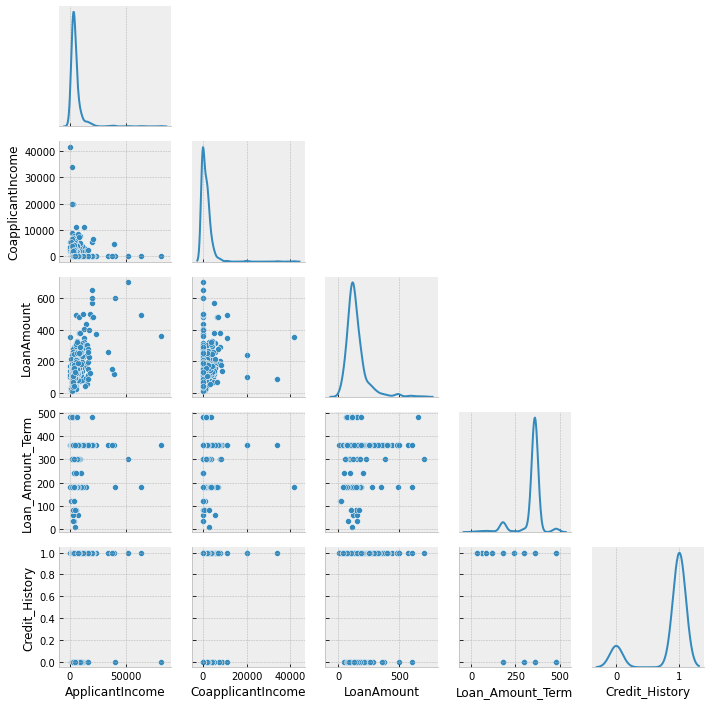

In [8]:
# Visualizing numerical variable distributions and multivariate relationships
plt.style.use("bmh")
g = sns.PairGrid(loan_data, diag_sharey = False, corner = True, height = 2)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
plt.show()

Most of the quantitative distributions are skewed. Credit history seems to be a bimodal distribution with two centers at 0 and 1.
It could be a binary classification that was imported as an integer. If so, it should be converted to a string class. 

In [9]:
# converting credit_history to string
loan_data["Credit_History"] = loan_data["Credit_History"].astype("str")
loan_data.Credit_History.dtype

dtype('O')

The loan amount values are stated in thousands. They should be converted regular numerical values.

In [10]:
# converting loan amounts to regular values
loan_data["LoanAmount"] = loan_data["LoanAmount"] * 1000
loan_data.LoanAmount.head()

0         NaN
1    128000.0
2     66000.0
3    120000.0
4    141000.0
Name: LoanAmount, dtype: float64

It might also be useful to use a logarithm in the numerical variables to see if linear relationships become more clear.

In [11]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# custom function to avoid zero division
def ln_10(x):
    if np.issubdtype(x.dtype, np.number):
        return np.log10(x + 1)
    else:
        return x

In [13]:
# apply custom log 10 function to dataframe
numeric_loan_data = loan_data.apply(ln_10)
numeric_loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,3.767156,0.000000,NaN,2.557507,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,3.661245,3.178689,5.107213,2.557507,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3.477266,0.000000,4.819551,2.557507,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,3.412293,3.372728,5.079185,2.557507,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,3.778224,0.000000,5.149222,2.557507,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,3.733839,3.622939,5.426513,2.557507,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,3.368101,3.180986,4.977728,2.557507,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3.482445,3.398808,5.198660,2.557507,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,3.602819,3.183839,5.225312,2.557507,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,4.108633,4.040167,5.542827,2.557507,1.0,Semiurban,N


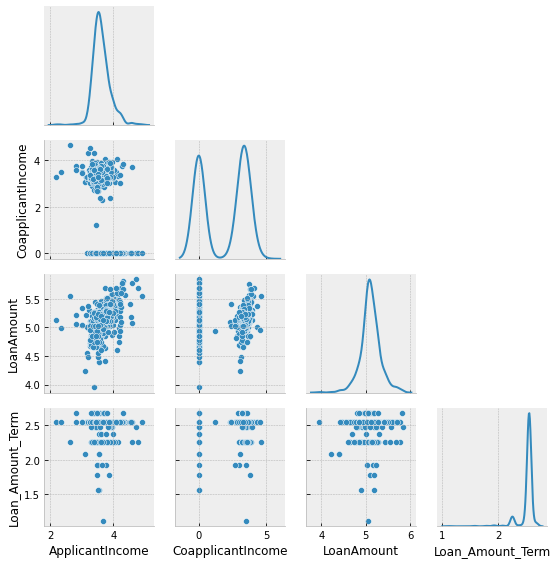

In [14]:
# Visualizing log numerical variable distributions and multivariate relationships
plt.style.use("bmh")
g = sns.PairGrid(numeric_loan_data, diag_sharey = False, corner = True, height = 2)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
plt.show()

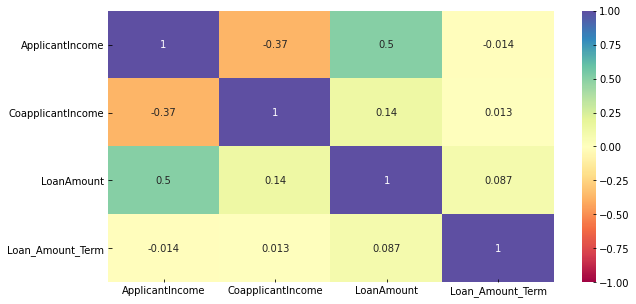

In [15]:
# Creating correlation matrix
corr_matrix = numeric_loan_data.corr()

# visualizing it
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.show()

The LoanAmount and ApplicantIncome relationship is showing moderately strong positive linear correlation.
Copplicantincome and ApplicantIncome shows a negative linear relationship.
There is also some positive linear correlation between LoanAmount and Coapplicantincome.

In [16]:
# converting categorical values to numerical to see relationships 
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in loan_data.columns :
  data_encoded[i] = label.fit_transform(loan_data[i])

In [17]:
# first five rows
data_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [18]:
# data types
data_encoded.dtypes

Loan_ID              int64
Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int64
Loan_Status          int64
dtype: object

In [19]:
# relationships between loan_status and other variables
from scipy.stats import chi2_contingency

# custome code retrieved from Kaggle, slightly tweeked
def cramers_V(var1, var2) :
  crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat / (obs * mini))

In [20]:
# building new matrix with results
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df.sort_values(["Loan_Status"], ascending = False)[2:]["Loan_Status"]

ApplicantIncome      0.83
CoapplicantIncome    0.46
LoanAmount           0.33
Credit_History       0.29
Loan_Amount_Term     0.02
Property_Area        0.02
Married              0.01
Dependents           0.01
Education            0.01
Gender               0.00
Self_Employed        0.00
Name: Loan_Status, dtype: float64

The Cramer's V test was for experimental purposes.
It might more appropriate to use an ANOVA test for numerical and caterogical relationships.
I'll use some of these correlation results to get some practice using a machine learning pipeline. 

# Machine Learning Pipeline
I will import some scikit-learn packages in the following section to use in the workflow.

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

We previously saw some null values present for some variables. 
Let's take another look so we can deal with them.

In [22]:
# counting number of nulls
null_series = pd.Series(loan_data.isna().sum())
null_series[null_series > 0].sort_values(ascending = False)

Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

Credit_History was converted to string which is why there are no null values present.
Let's convert them back.

In [23]:
# converting credit_history to string
pd.options.mode.chained_assignment = None  # default='warn'
loan_data["Credit_History"][loan_data["Credit_History"] == "nan"] = np.nan
print(loan_data.Credit_History.value_counts())
pd.options.mode.chained_assignment = "warn"  # default='warn'

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [24]:
# counting number of nulls
null_series = pd.Series(loan_data.isna().sum())
null_series[null_series > 0].sort_values(ascending = False)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

Let's look at the data types again so we can impute values properly.

In [25]:
# retrieving column names with null values
col_names = null_series[null_series > 0].index

# data types
loan_data[col_names].dtypes

Gender               object
Married              object
Dependents           object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
dtype: object

Now is a good opportunity to split the data into features and target variables.

In [26]:
# features
X = loan_data.drop(["Loan_ID", "Loan_Status"], axis = 1)

# target
y = loan_data["Loan_Status"]

# splitting the data using K-Folds Cross Validation
kf = KFold(n_splits = 2, random_state = 1, shuffle = True)

# enumerate splits
for train_index, test_index in kf.split(X):
    print("Train:", len(train_index), "Test:", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: 307 Test: 307
Train: 307 Test: 307


The SimpleImputer and OneHotEncoder classes are good solutions to deal with numerical variable imputations and categorical variables respectively.

In [27]:
# creating simple imputer and OneHotEncoder objects
simple_imp = SimpleImputer(strategy = "mean") # for numerical variables
constant_imp = SimpleImputer(strategy = "most_frequent")
ohe = OneHotEncoder()

In [28]:
# listing column names
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
# creating pipeline for categorical variables transformation
imp_ohe = make_pipeline(constant_imp, ohe) 

## column transformer runs in parallel. 
## seperate pipeline was made to deal with categorical transformations. 

In [30]:
# transforming columns using a column transformer
ct_imputer = make_column_transformer(
    (imp_ohe, ["Credit_History", "Property_Area"]),
    (simple_imp, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])
)

In [31]:
# creating an instance of a logreg model
logreg = LogisticRegression(solver = 'liblinear', random_state = 1)

In [32]:
# creating a pipeline to faciliate column transformation and model implementation
pipe = make_pipeline(ct_imputer, logreg)
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [33]:
# checking accuracy with cross val score function
from sklearn.model_selection import cross_val_score
round(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean(), 3)

0.687

Obviously, this is not a good model, and a lot more can be done to improve it.
Techniques like dropping missing values instead of imputing, different statistical tests, hyperparamter tuning, feature engineering, model tuning, and/or model selection should improve the model performance.
Anyways, the exploratory exercise and going through a machine learning pipeline helped me understand different ways to tackle parts of the data mining process. 